In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_new = df.filter(["OverallQual", "GrLivArea","GarageCars" ,"TotalBsmtSF" ,"FullBath", "YearBuilt","SalePrice"])

In [6]:
df_new.to_csv("new_test.csv", index=False)

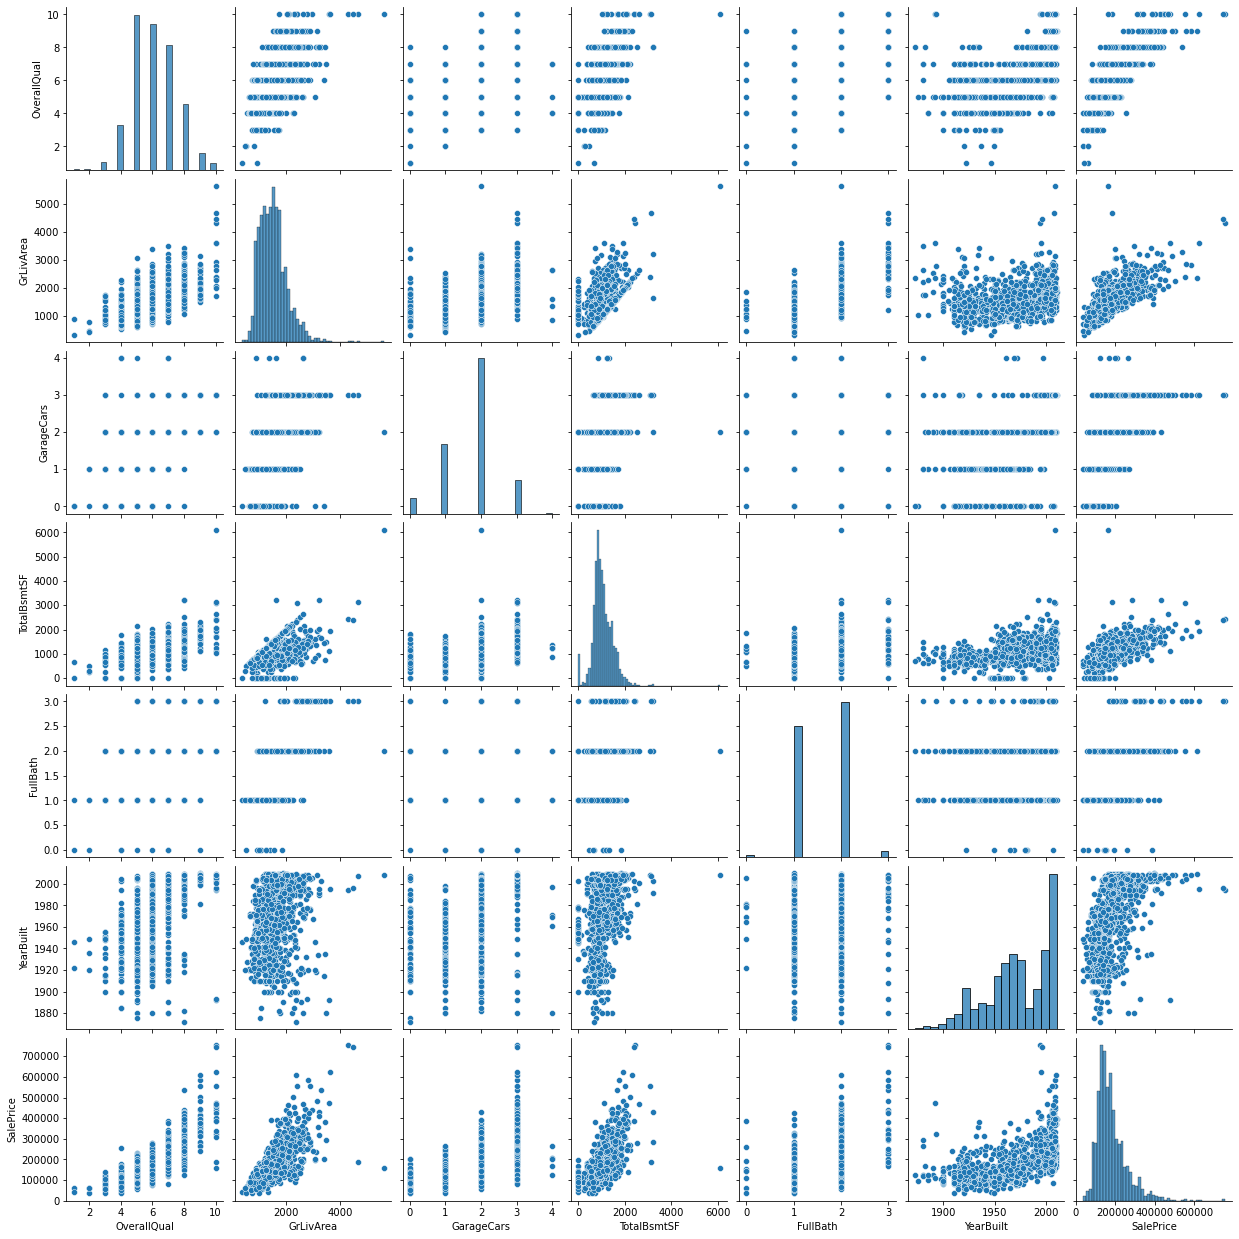

In [7]:
sns.pairplot(df_new) 

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
 4   FullBath     1460 non-null   int64
 5   YearBuilt    1460 non-null   int64
 6   SalePrice    1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [9]:
df_new.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808,180921.195890
std,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,34900.000000
25%,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000,129975.000000
50%,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000,163000.000000
75%,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000,214000.000000
max,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000,755000.000000


In [10]:
df_test = pd.read_csv("test.csv")

In [11]:
df_test_new = df_test.filter(["OverallQual", "GrLivArea","GarageCars" ,"TotalBsmtSF" ,"FullBath", "YearBuilt","SalePrice"])

In [15]:
##imports for nural networks
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Activation, Dense

In [16]:
df_new.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,1710,2,856,2,2003,208500
1,6,1262,2,1262,2,1976,181500
2,7,1786,2,920,2,2001,223500
3,7,1717,3,756,1,1915,140000
4,8,2198,3,1145,2,2000,250000


In [17]:
input_data , lable_data = df_new.filter(["OverallQual", "GrLivArea","GarageCars" ,"TotalBsmtSF" ,"FullBath", "YearBuilt"]), df_new.filter(["SalePrice"])

In [18]:
input_data, lable_data

(      OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  YearBuilt
 0               7       1710           2          856         2       2003
 1               6       1262           2         1262         2       1976
 2               7       1786           2          920         2       2001
 3               7       1717           3          756         1       1915
 4               8       2198           3         1145         2       2000
 ...           ...        ...         ...          ...       ...        ...
 1455            6       1647           2          953         2       1999
 1456            6       2073           2         1542         2       1978
 1457            7       2340           1         1152         2       1941
 1458            5       1078           1         1078         1       1950
 1459            5       1256           1         1256         1       1965
 
 [1460 rows x 6 columns],
       SalePrice
 0        208500
 1        181500
 2       

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [45]:
input_data.values

array([[   7, 1710,    2,  856,    2, 2003],
       [   6, 1262,    2, 1262,    2, 1976],
       [   7, 1786,    2,  920,    2, 2001],
       ...,
       [   7, 2340,    1, 1152,    2, 1941],
       [   5, 1078,    1, 1078,    1, 1950],
       [   5, 1256,    1, 1256,    1, 1965]])

In [52]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6,activation='relu',input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(25,activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(50,activation='relu'))
# Adding the output layer
classifier.add(Dense(1))

# Compiling the ANN


opt = keras.optimizers.SGD(learning_rate=100)
# model.compile(loss='categorical_crossentropy', optimizer=opt)
classifier.compile(loss="mean_squared_error", optimizer=opt)

# Fitting the ANN to the Training set
classifier.fit(input_data.values, lable_data.values,validation_split=0.1, batch_size = 32, epochs = 100)





Epoch 1/100
42/42 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
42/42 [==============================] - 0s 2ms/step - l

42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 89/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 90/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 91/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 92/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 93/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 94/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 95/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 96/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 97/100
42/42 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 98/100
42/42 [==============================] - 0s 1ms/step - loss: